In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
dirname = "/home/daniela/git/analyzing-corpora/data/data/enron_out_0.1/"

In [47]:

from corpora.scikit import ScikitLda

import os
import zlib
import numpy
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy import sparse
topics = []
for subdir in [x[0] for x in os.walk(dirname)][1:]:
    for filename in os.listdir(subdir):
        if filename.endswith('pkl'):
            print("attempting... ", filename)
            lda = ScikitLda.load(subdir+"/"+filename)
            for topic in lda.topics:
                topics.append(topic / topic.sum())

('attempting... ', 'lda_87.pkl')
('attempting... ', 'lda_3.pkl')
('attempting... ', 'lda_20.pkl')
('attempting... ', 'lda_100.pkl')
('attempting... ', 'lda_4.pkl')
('attempting... ', 'lda_43.pkl')
('attempting... ', 'lda_63.pkl')
('attempting... ', 'lda_34.pkl')
('attempting... ', 'lda_74.pkl')
('attempting... ', 'lda_7.pkl')
('attempting... ', 'lda_52.pkl')
('attempting... ', 'lda_27.pkl')
('attempting... ', 'lda_15.pkl')


In [48]:
topics

[array([  1.56543402e-09,   1.56543402e-09,   1.56543402e-09, ...,
          1.56543402e-09,   1.56543402e-09,   1.56543402e-09]),
 array([  2.26854583e-07,   2.26854583e-07,   2.26854583e-07, ...,
          2.26854583e-07,   2.26854583e-07,   2.26854583e-07]),
 array([  3.01134467e-08,   3.01134467e-08,   3.01134467e-08, ...,
          3.01134467e-08,   3.01134467e-08,   3.01134467e-08]),
 array([  4.71741237e-08,   4.71741237e-08,   4.71741237e-08, ...,
          4.71741237e-08,   4.71741237e-08,   4.71741237e-08]),
 array([  5.03724032e-09,   5.03724032e-09,   5.03724032e-09, ...,
          5.03724032e-09,   5.03724032e-09,   5.03724032e-09]),
 array([  6.30511418e-09,   6.30511418e-09,   6.30511418e-09, ...,
          6.30511418e-09,   6.30511418e-09,   6.30511418e-09]),
 array([  8.86065597e-08,   8.86065597e-08,   8.86065597e-08, ...,
          8.86065597e-08,   8.86065597e-08,   8.86065597e-08]),
 array([  3.00552207e-08,   3.00552207e-08,   3.00552207e-08, ...,
          3.0055

In [49]:
'''
The first step is convert the similarity matrix into distance matrix(=dist_matrix). 
Note: more similar the item, lesser is their distance.
'''
cos_distance = pairwise_distances(topics, metric='cosine')

In [50]:
cos_distance

array([[  7.73603404e-13,   9.99980031e-01,   9.93270756e-01, ...,
          9.93294338e-01,   9.94183725e-01,   9.21961588e-01],
       [  9.99980031e-01,  -1.40065737e-12,   9.99996223e-01, ...,
          9.98381465e-01,   9.99965391e-01,   9.98948422e-01],
       [  9.93270756e-01,   9.99996223e-01,   7.12796489e-12, ...,
          6.82165117e-01,   9.99851339e-01,   9.22496272e-01],
       ..., 
       [  9.93294338e-01,   9.98381465e-01,   6.82165117e-01, ...,
         -2.27773356e-12,   9.98406192e-01,   8.49138435e-01],
       [  9.94183725e-01,   9.99965391e-01,   9.99851339e-01, ...,
          9.98406192e-01,   4.53770355e-12,   9.99725539e-01],
       [  9.21961588e-01,   9.98948422e-01,   9.22496272e-01, ...,
          8.49138435e-01,   9.99725539e-01,   4.86455320e-12]])

In [51]:
from sklearn import manifold

In [52]:
from sklearn.manifold import MDS 
MDS() 
# pick number of components=2 so that we can plot on 2-space., random_state is chosen so that we can re-produce. 
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1) 
pos = mds.fit_transform(cos_distance) # shape (n_components, n_samples) 
xs, ys = pos[:, 0], pos[:, 1]

In [53]:
len(pos)

529

In [54]:
import matplotlib.pyplot as plt

In [73]:
from sklearn.cluster import KMeans
k_fit = KMeans(n_clusters=20).fit_predict(cos_distance)

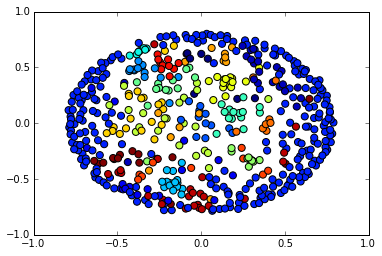

In [74]:
plt.scatter(xs,ys, c=k_fit, s=50)